In [1]:
!nvidia-smi --query-gpu=name,memory.total,memory.free --format=csv,noheader

NVIDIA RTX A5000, 24564 MiB, 24255 MiB


In [1]:
%pip install -q jupyter_compare_view

Note: you may need to restart the kernel to use updated packages.


In [1]:
# Fill in these environment variables
%env MODEL_NAME=stabilityai/stable-diffusion-2-depth
%env INSTANCE_DIR=/volume/pics
%env CLASS_DIR=/volume/person
%env OUTPUT_DIR=/volume/output-2
%load_ext autoreload

env: MODEL_NAME=stabilityai/stable-diffusion-2-depth
env: INSTANCE_DIR=/volume/pics
env: CLASS_DIR=/volume/person
env: OUTPUT_DIR=/volume/output-2


In [2]:
!pip install -q diffusers ftfy accelerate bitsandbytes
!pip uninstall -y transformers
!pip install git+https://github.com/huggingface/transformers.git@main

Found existing installation: transformers 4.26.0.dev0
Uninstalling transformers-4.26.0.dev0:
  Successfully uninstalled transformers-4.26.0.dev0
  Cloning https://github.com/huggingface/transformers.git (to revision main) to /tmp/pip-req-build-_owi982g
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/transformers.git /tmp/pip-req-build-_owi982g
  Resolved https://github.com/huggingface/transformers.git to commit 3be028bc9d4b2cce9539b940f17052f333284684
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for transformers: filename=transformers-4.26.0.dev0-py3-none-any.whl size=6029389 sha256=3474cdffaa8906b35018eaa185ef568a19f79cf624322aab0cc5535df4abe719
  Stored in directory: /tmp/pip-ephem-wheel-cache-ur9j8dww/wheels/0c/f1/cf/0c84f8631406672e9adab41401961ab0d771b0b9c6f7195624
Successfully built transformers


In [5]:
%autoreload 2

#!python -m debugpy --listen 0.0.0.0:5678 --wait-for-client \
!accelerate launch \
  train_dreambooth.py \
  --mixed_precision="fp16" \
  --pretrained_model_name_or_path='stabilityai/stable-diffusion-2-depth'  \
  --pretrained_txt2img_model_name_or_path="stabilityai/stable-diffusion-2-1-base" \
  --train_text_encoder \
  --instance_data_dir=$INSTANCE_DIR \
  --class_data_dir=$CLASS_DIR \
  --output_dir=$OUTPUT_DIR \
  --with_prior_preservation --prior_loss_weight=1.0 \
  --instance_prompt="a photo of a sks man, balding, short hair, with a short 3 days beard" \
  --class_prompt="a photo of a man, balding, short hair, with a short 3 days beard" \
  --resolution=512 \
  --train_batch_size=1 \
  --gradient_accumulation_steps=1 \
  --learning_rate=1e-6 \
  --lr_scheduler="constant" \
  --lr_warmup_steps=0 \
  --num_class_images=400 \
  --max_train_steps=300 \
  --use_8bit_adam

The following values were not passed to `accelerate launch` and had defaults used instead:
	`--num_processes` was set to a value of `1`
	`--num_machines` was set to a value of `1`
	`--mixed_precision` was set to a value of `'no'`
	`--num_cpu_threads_per_process` was set to `64` to improve out-of-box performance
To avoid this warning pass in values for each of the problematic parameters or run `accelerate config`.
You are using a model of type clip_text_model to instantiate a model of type . This is not supported for all configurations of models and can yield errors.
^C
Traceback (most recent call last):
  File "train_dreambooth.py", line 839, in <module>
    main(args)
  File "train_dreambooth.py", line 560, in main
    text_encoder = text_encoder_cls.from_pretrained(
  File "/usr/local/lib/python3.8/dist-packages/transformers/modeling_utils.py", line 2351, in from_pretrained
    model = cls(config, *model_args, **model_kwargs)
  File "/usr/local/lib/python3.8/dist-packages/transformer

In [4]:
#!python -m debugpy --listen 0.0.0.0:5678 --wait-for-client \
!accelerate launch \
  train_dreambooth.py \
  --mixed_precision="fp16" \
  --pretrained_model_name_or_path='stabilityai/stable-diffusion-2-depth'  \
  --pretrained_txt2img_model_name_or_path="stabilityai/stable-diffusion-2-1-base" \
  --train_text_encoder \
  --instance_data_dir=$INSTANCE_DIR \
  --class_data_dir=$CLASS_DIR \
  --output_dir=$OUTPUT_DIR \
  --with_prior_preservation --prior_loss_weight=1.0 \
  --instance_prompt="sks man" \
  --class_prompt="a photo of a man, balding, short hair, with a short 3 days beard" \
  --resolution=256 \
  --train_batch_size=1 \
  --gradient_accumulation_steps=1 \
  --learning_rate=1e-6 \
  --lr_scheduler="constant" \
  --lr_warmup_steps=0 \
  --num_class_images=400 \
  --max_train_steps=3000 \
  --use_8bit_adam

The following values were not passed to `accelerate launch` and had defaults used instead:
	`--num_processes` was set to a value of `1`
	`--num_machines` was set to a value of `1`
	`--mixed_precision` was set to a value of `'no'`
	`--num_cpu_threads_per_process` was set to `64` to improve out-of-box performance
To avoid this warning pass in values for each of the problematic parameters or run `accelerate config`.
You are using a model of type clip_text_model to instantiate a model of type . This is not supported for all configurations of models and can yield errors.
Fetching 19 files: 100%|█████████████████████| 19/19 [00:00<00:00, 13509.37it/s]
For each image in /volume/pics, creating a depth image.
100%|████████████████████████████████████████| 28/28 [00:00<00:00, 84006.09it/s]
For each image in /volume/person, creating a depth image.
Steps: 100%|███████████| 3000/3000 [23:40<00:00,  2.11it/s, loss=0.822, lr=1e-6]


In [24]:
import gc
torch.cuda.empty_cache()
gc.collect()

0

# Test the model you just made

In [7]:
import PIL
import torch
from torchvision import transforms
import diffusers
import transformers
from diffusers import StableDiffusionDepth2ImgPipeline
import os
from jupyter_compare_view import compare

Jupyter compare_view v0.2.0


In [8]:
print(f'Getting model from {os.environ.get("OUTPUT_DIR")}')
pipeline = StableDiffusionDepth2ImgPipeline.from_pretrained(os.environ.get('OUTPUT_DIR'))
pipeline = pipeline.to("cuda")

Getting model from /volume/output-2



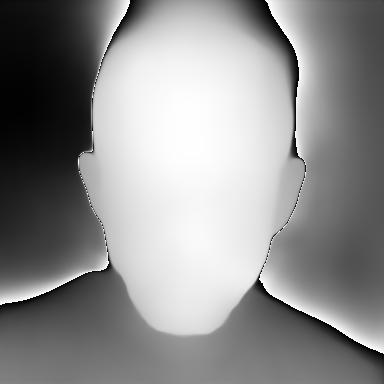
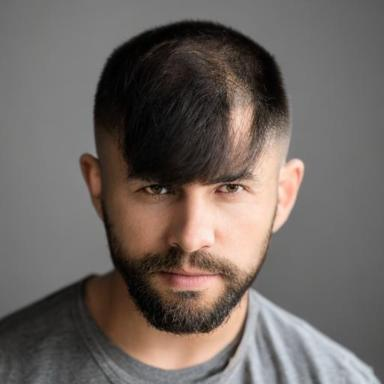

In [15]:
# Use an image as an input depth map
image_path = "/volume/dreambooth_depth2img/333-01570b99ffb4945c1ed4b378ba27457cda61271e.jpg" # replace with whatever you want
image = PIL.Image.open(image_path)

image_transform = transforms.Compose(
    [
        transforms.Resize((384, 384)),
        transforms.ToTensor()
    ]
)
image = image_transform(image)
image = image[None,:,:,:]
image = image.to("cuda")
depth_map = pipeline.depth_estimator(image).predicted_depth
image = transforms.ToPILImage()(image[0])
depth_min = torch.amin(depth_map, dim=[0, 1, 2], keepdim=True)
depth_max = torch.amax(depth_map, dim=[0, 1, 2], keepdim=True)
depth_map = 2.0 * (depth_map - depth_min) / (depth_max - depth_min) - 1.0
depth_map = depth_map[0,:,:]
depth_map = transforms.ToPILImage()(depth_map)
compare(depth_map, image, cmap="gray", start_mode="horizontal", start_slider_pos=0.73)

  0%|          | 0/50 [00:00<?, ?it/s]


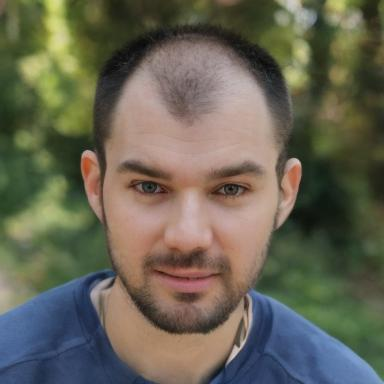
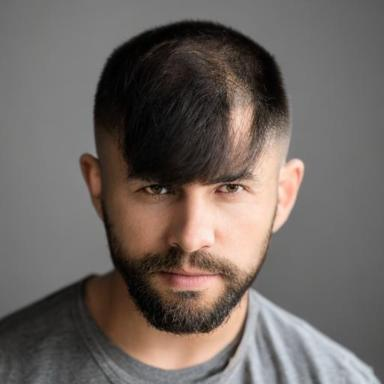

In [96]:
result = pipeline("sks man", 
                image, negative_prompt="drawing, cartoon", 
                strength=1.0, guidance_scale=1)
compare(result[0][0], image, cmap="gray", start_mode="horizontal", start_slider_pos=0.73)

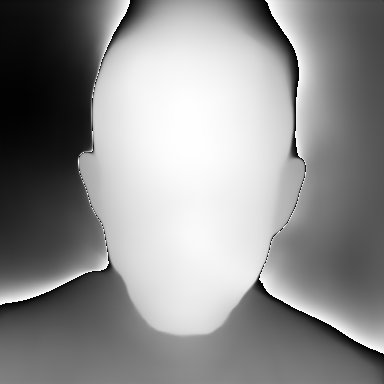

In [62]:
depth_map